Script 3. Classification using spectral (Fourier) and Wavelet features.

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

import pywt # for testing

# functions for feature extraction 
from extract_spectral_features import first_n_spectral_peaks
from extract_wavelet_features import get_wt_features

import matplotlib.pyplot as plt
%matplotlib inline

from target_to_binary import is_seizure

/home/alex/Apprentissage/OTUS/ML_advanced/module3/homework3/repo_Git/src/extract_wavelet_features.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
file_path  = '../dat/Epileptic_Seizure_Recognition.csv'
data = pd.read_csv(file_path)
print(data.shape)  # (11500, 180)
del file_path

# remove the 1st column (Unnamed)
data.drop(columns=[list(data)[0]], inplace=True)

(11500, 180)


In [3]:
# group all classes >1 (healthy) together into new class 0
target = list(data)[-1]  # "y"

features = list(data)[0:-1]
print(len(features))  # 178

data[target] = data[target].apply(is_seizure)

data.head()

178


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


Extract spectral features.

In [4]:
# Extract the features for all rows and pack them in a new DF.

mat_signals = data[features].to_numpy(dtype=float)
print(mat_signals.shape) # (11500, 178)

spectral_feat = np.apply_along_axis(first_n_spectral_peaks, 1, mat_signals)

# print(type(spectral_feat))  # ndarray
# print(spectral_feat.shape)  # (11500, 8)

spectral_feat[:5, :]
# row 2 : # [4. , 13. , 19. , 28. , 16200., 130., 49., 70.]
# (the last 4 nbs are approximations)

(11500, 178)


array([[1.00000000e+00, 5.00000000e+00, 8.00000000e+00, 1.10000000e+01,
        8.76138470e+04, 2.05304876e+05, 1.12408384e+04, 1.85990271e+03],
       [1.00000000e+00, 5.00000000e+00, 2.40000000e+01, 2.80000000e+01,
        6.33826769e+06, 1.22868826e+06, 6.06791252e+02, 6.91684659e+02],
       [4.00000000e+00, 1.30000000e+01, 1.90000000e+01, 2.80000000e+01,
        1.61936969e+04, 1.29670915e+02, 4.89831752e+01, 7.03900495e+01],
       [1.00000000e+00, 5.00000000e+00, 8.00000000e+00, 1.80000000e+01,
        2.14658681e+03, 1.92705774e+03, 7.53895962e+02, 7.42777281e+01],
       [4.00000000e+00, 7.00000000e+00, 1.80000000e+01, 2.50000000e+01,
        9.23585037e+03, 8.99188986e+03, 9.88354297e+01, 1.49104800e+01]])

Wavelet transforms.

<class 'list'>
6
[(8,), (8,), (13,), (24,), (46,), (90,)]


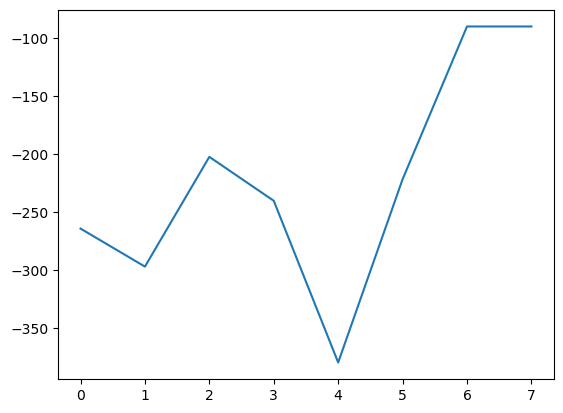

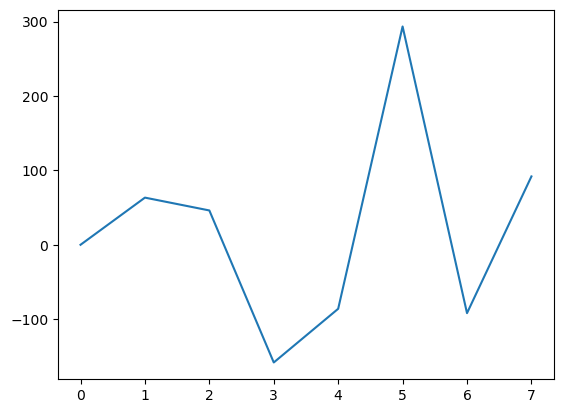

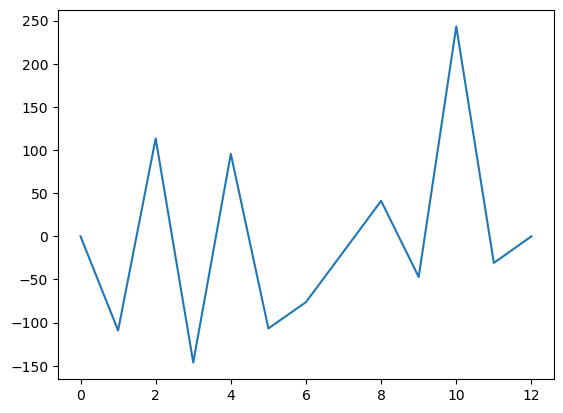

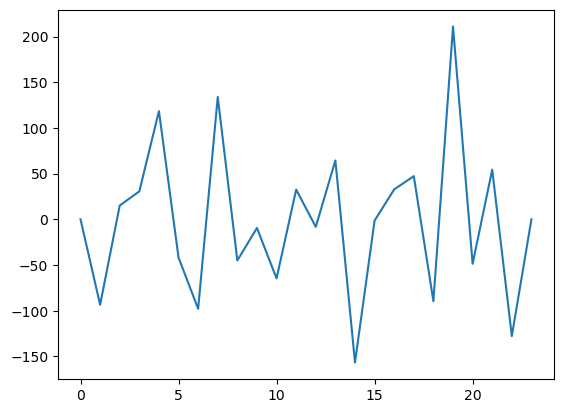

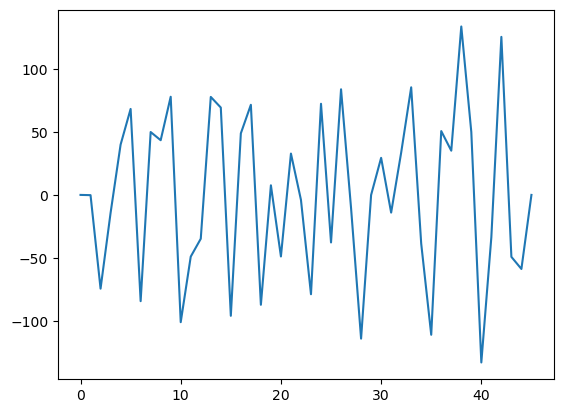

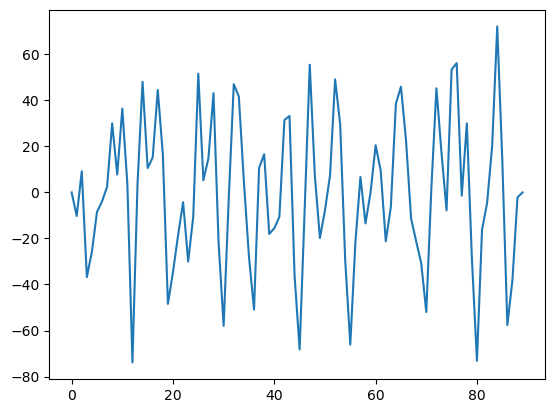

[[<matplotlib.lines.Line2D at 0x753b47139510>],

In [5]:
# example of wavelets for 1 signal.
waveletname = 'rbio3.1'
ex_signal = data[features].loc[2]


list_sample_dwt = pywt.wavedec(ex_signal, waveletname)

print(type(list_sample_dwt))  # list
print(len(list_sample_dwt))   # 6
print([wavelet.shape for wavelet in list_sample_dwt])
# (8,), (8,), (13,), (24,), (46,), (90,)]
# The number of wavelet signals (6) is the same as in the cas of signals of length 128,
# but the signals are longer.

def plt_new_win(in_sig):
    fig, ax = plt.subplots()
    plotted_line = ax.plot(in_sig)
    plt.show()
    return plotted_line

list(map(plt_new_win,list_sample_dwt))

In [6]:
# Wavelet features for the whole dataset 
# This takes some time.

tens_signals = np.expand_dims(mat_signals, axis=2)

wavelet_feat = get_wt_features(tens_signals, waveletname ) 

# print(type(wavelet_features))  # ndarray
print(wavelet_feat.shape)  # (11500, 72)

(11500, 72)


Assemble all features into a new dataset.

In [7]:
data_features = np.hstack((spectral_feat, wavelet_feat))

# print(type(data_features))  # ndarray
print(data_features.shape)  # (11500, 81)

(11500, 80)


train-test split

In [8]:

X_train, X_test, y_train, y_test = train_test_split(data_features, data[target], test_size=0.2, stratify=data[target], random_state=42)

print(X_train.shape)  # (9200, 80)
print(X_test.shape)   # (2300, 80)
print(y_train.shape)  # (9200,)
print(y_test.shape)   # (2300,)

(9200, 80)
(2300, 80)
(9200,)
(2300,)


Train a Random-Forest classifier

In [9]:
# the depth of trees is bounded in order to avoid overtraining. 
clf = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=50, random_state=1)

Check its performance on training set

In [10]:
preds_train = clf.predict(X_train)
print(classification_report(y_train, preds_train))

# f1-score for class 1 on train data : 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7360
           1       1.00      1.00      1.00      1840

    accuracy                           1.00      9200
   macro avg       1.00      1.00      1.00      9200
weighted avg       1.00      1.00      1.00      9200



Check its performance on test set

In [11]:
preds_test = clf.predict(X_test)
print(classification_report(y_test, preds_test))

# f1-score for class 1 on test data: 0.96

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1840
           1       0.97      0.95      0.96       460

    accuracy                           0.98      2300
   macro avg       0.98      0.97      0.97      2300
weighted avg       0.98      0.98      0.98      2300



Luckily, the spectral and wavelet features improve the classification performance! One can search to improve it further by changing hyperparameters, or by finding and keeping the most relevant features.